In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `c:\Users\steal\Downloads`


In [ ]:
Pkg.add(["Plots","Distributions","Random","Polynomials","Statistics"])

   Resolving package versions...
   Installed GR_jll ───────────── v0.73.13+0
   Installed InlineStrings ────── v1.4.3
   Installed TimerOutputs ─────── v0.5.28
   Installed PNGFiles ─────────── v0.4.4
   Installed Accessors ────────── v0.1.42
   Installed MutableArithmetics ─ v1.6.4
   Installed StaticArrays ─────── v1.9.13
   Installed Pango_jll ────────── v1.56.1+0
   Installed Roots ────────────── v2.2.6
   Installed JLD2 ─────────────── v0.4.54
   Installed FileIO ───────────── v1.17.0
   Installed Polynomials ──────── v4.0.18
   Installed CodecZlib ────────── v0.7.8
   Installed Zstd_jll ─────────── v1.5.7+1
   Installed Setfield ─────────── v1.1.2
   Installed XML2_jll ─────────── v2.13.6+1
   Installed ColorSchemes ─────── v3.29.0
   Installed OpenSSL_jll ──────── v3.0.16+0
   Installed FilePathsBase ────── v0.9.23
   Installed Requires ─────────── v1.3.1
   Installed IntervalArithmetic ─ v0.22.23
   Installed Krylov ───────────── v0.9.10
   Installed GR ───────────────── v0.73

This chapter is on the concept of least-square fitting of data.  The assumption that we are making here is that each data point that we are measuring is independent of each other and that each data point $y_{i}=f(x_{i},\theta)$ has an error that has been drawn from a normal distribution with zero mean and standard deviation $\sigma_{i}$. $\theta$ represents the parameters of the model $f(x,\theta)$ with which you want to fit the data.
Lets find out what we can say about the likelihood pdf of such data:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \prod_{i}\frac{1}{\sqrt{2\pi\sigma^2}}\exp\big(-\frac{(y_{i}(x_{i})-f(x_{i},\theta))^2}{2\sigma_{i}^2}\big)$$
Least-square fits are often also called $\chi^2$ fits.  $\chi^2$ is defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$
which simplifies the likelihood to:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$
now let's assume also that the prior distribution for your parameters is flat $P(\theta)=const$.  Then
$$P(\theta \mid \{y_{i}(x_{i})\}) \propto P (\{y_{i}(x_{i})\}\mid \theta)$$
and if you are only interested in the maximum value of the $P(\theta \mid \{y_{i}(x_{i})\})$ then you need to find the minimum value of $\chi^2$.  That is what people mean when they talk about least-square fitting: minimizing $\chi^2$ as a function of $\theta$.

In [2]:
using Plots
import Distributions as di
using Random
using Polynomials: Polynomial, fit, coeffs
using Statistics

ArgumentError: ArgumentError: Package Plots not found in current path.
- Run `import Pkg; Pkg.add("Plots")` to install the Plots package.

In [7]:
x = 0:10

0:10

In [8]:
collect(x)

11-element Vector{Int64}:
  0
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [54]:
dataerr = 3.0
nd = di.Normal(0, dataerr)

Normal{Float64}(μ=0.0, σ=3.0)

In [114]:
y_true = 3.0 .* x .+ 1.0
y = y_true .+ rand(nd, length(x))

11-element Vector{Float64}:
  2.8338644178438788
  4.291208325117617
 13.435920997501677
  7.064618741743062
 16.134524129414295
 11.574332929995144
 16.32512731205968
 20.75957775917277
 25.082177241399595
 29.793736499466736
 32.49742516006341

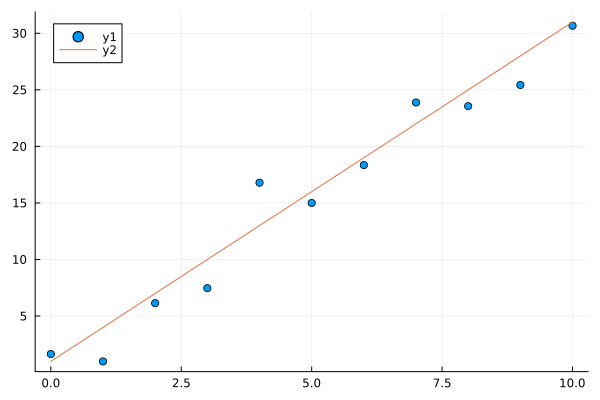

In [70]:
scatter(x,y)
plot!(x,y_true)

In [71]:
Polynomial([1,-1,3])

Polynomial(1 - x + 3*x^2)

In [72]:
line_fit = fit(x,y,1)

Polynomial(0.46648263340019497 + 2.9959580802279366*x)

In [73]:
fit_coeffs = coeffs(line_fit)

2-element Vector{Float64}:
 0.46648263340019497
 2.9959580802279366

In [74]:
y_fitted = fit_coeffs[1] .+ fit_coeffs[2] .* x

0.46648263340019497:2.9959580802279366:30.42606343567956

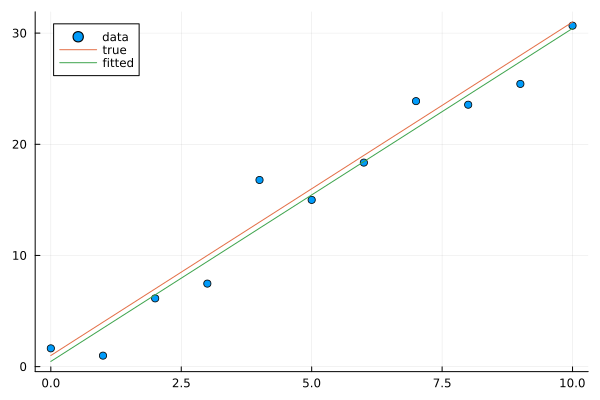

In [75]:
scatter(x,y, label="data")
plot!(x,y_true , label="true")
plot!(x,y_fitted, label="fitted")

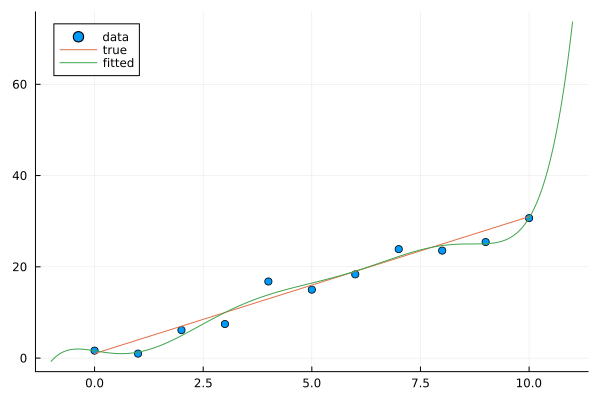

In [82]:
poly_fit = fit(x,y,7)
x_fit = -1:0.001:11
y_polyfit = poly_fit.(x_fit)
scatter(x,y, label="data")
plot!(x,y_true , label="true")
plot!(x_fit,y_polyfit, label="fitted")

In [83]:
function chisqr(x,y,sigma,fitfct)
    return sum((y .- fitfct.(x)).^2 ./ sigma.^2)
end

chisqr (generic function with 1 method)

In [95]:
chi2list = []
for i in 1:5000
    y = y_true .+ rand(nd, length(x))
    line_fit = fit(x,y,1)
    push!(chi2list, chisqr(x,y,dataerr,line_fit))
end

In [104]:
chi2dist = Chisq(9)
chi2var = 0:0.01:40

0.0:0.01:40.0

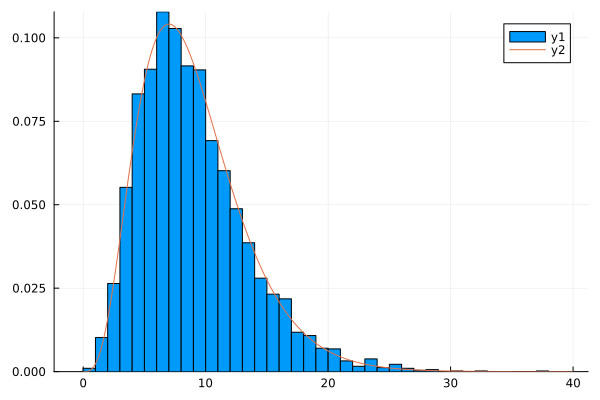

In [105]:
histogram(chi2list, normed = true)
plot!(chi2var, pdf.(chi2dist,chi2var))

In [99]:
mean(chi2list)

8.97413875321098

In [112]:
chi2list2 = []
for i in 1:5000
    y = y_true .+ rand(nd, length(x))
    cubic_fit = fit(x,y,3)
    push!(chi2list2, chisqr(x,y,dataerr,cubic_fit))
end

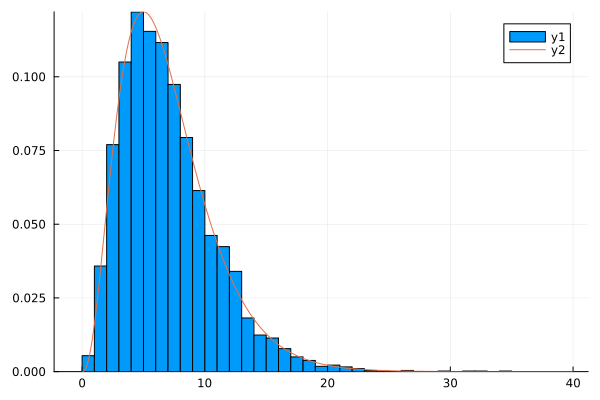

In [113]:
chi2dist2 = Chisq(7)
histogram(chi2list2, normed = true)
plot!(chi2var, pdf.(chi2dist2,chi2var))

In [120]:
function chisqr_dist(b, m; y=y, x=x, sigma=dataerr)
    return sum((y .- b .- m .* x ).^2 ./ sigma.^2)
end

function p_like(b,m; y=y, x=x, sigma=dataerr)
    return exp.(-sum((y .- b .- m .* x ).^2 ./ sigma.^2) ./ 2)
end

p_like (generic function with 1 method)

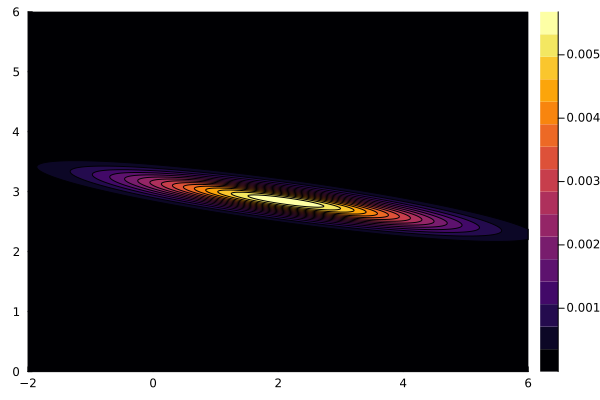

In [122]:
br = -2:0.01:6
mr = 0:0.01:6
contourf(br,mr,p_like)